In [ ]:
import numpy as np
import pandas as pd
train=pd.read_csv("C:\\Users\\Pratik\\Desktop\\additional_files\\train.dat",sep=' ')
test=pd.read_csv("C:\\Users\\Pratik\\Desktop\\additional_files\\test.dat",sep=' ')
directors=pd.read_csv("C:\\Users\\Pratik\\Desktop\\additional_files\\movie_directors.dat",sep='\t',encoding='latin1')
genres=pd.read_csv("C:\\Users\\Pratik\\Desktop\\additional_files\\movie_genres.dat",sep='\t')

y_train=train['rating']
X_train=train.drop(columns='rating')

In [ ]:
#Testing RMSE for training data without extra attributes
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1)

from sklearn.neighbors import KNeighborsRegressor
mse=[]
for k in range(1,99):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_trial=knn.predict(X_test)
    mse.append(mean_squared_error(y_test,y_trial))
min(mse)'''

0.9321901567883921

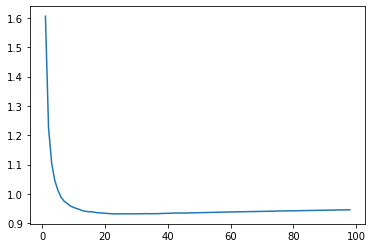

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,99),mse)

In [ ]:
#test director data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
directors['id']=le.fit_transform(directors['directorID'])

In [ ]:
#df=pd.merge(X_train,directors,on="movieID",how='left').drop(columns=['directorName','directorID'])
gen=pd.get_dummies(genres,columns=['genre']).groupby('movieID').sum().reset_index()
#gen['genre']=gen.iloc[:,1:].apply(tuple,axis=1)
#gen=gen[['movieID','genre']]
X_train=pd.merge(X_train,gen,on="movieID",how='left')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1)

In [ ]:
#test genre data
X_test=pd.merge(test,gen,on="movieID",how='left')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
'''from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)'''

In [ ]:
pd.DataFrame(y_pred).to_csv(path_or_buf='C:\\Users\\Pratik\\Desktop\\submission.txt',header=False,index=False,index_label=None,mode='w')

In [ ]:
data=train.pivot(index='userID',columns='movieID',values='rating')
data=data.fillna(data.mean())
matr=data.sub(data.mean(axis=1),axis=0)

In [ ]:
lim=21
from scipy.spatial.distance import pdist, squareform
sim=1-squareform(pdist(matr,'cosine'))
points=np.argpartition(sim,-lim)[:,-lim:]
sim=pd.DataFrame(data=sim,index=data.index,columns=data.index)

In [ ]:
high=[[data.index[points[i][j]] for j in range(lim)] for i in range(len(sim))]
high=pd.DataFrame(data=high,index=data.index,columns=np.arange(lim))

In [ ]:
fin=np.full((len(test),1),2.5)
for i in range(len(test)):
    if test['movieID'][i] in train['movieID'].values:
        user=test['userID'][i]
        N=0
        D=0
        for j in range(lim):
            temp=high.loc[user,j]
            if(user!=temp):
                N+=sim.loc[user,temp]*data.loc[temp,test['movieID'][i]]
                D+=sim.loc[user,temp]
        if(D!=0):
            fin[i]=N/D

In [ ]:
pd.DataFrame(fin).to_csv(path_or_buf='C:\\Users\\Pratik\\Desktop\\submission.txt',header=False,index=False,index_label=None,mode='w')